In [1]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical #copy all
import matplotlib.pyplot as plt

In [2]:
to_categorical?

Signature: to_categorical(y, num_classes=None, dtype='float32')
Docstring:
Converts a class vector (integers) to binary class matrix.

E.g. for use with categorical_crossentropy.

Arguments:
    y: class vector to be converted into a matrix
        (integers from 0 to num_classes).
    num_classes: total number of classes.
    dtype: The data type expected by the input. Default: `'float32'`.

Returns:
    A binary matrix representation of the input. The classes axis is placed
    last.
File:      ~/miniconda3/envs/ml/lib/python3.6/site-packages/tensorflow_core/python/keras/utils/np_utils.py
Type:      function


In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


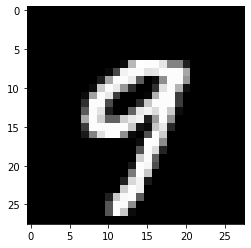

In [5]:
plt.imshow(X_train[y_train == 9][5], cmap='gray')

In [6]:
len(y_train)

60000

In [7]:
samples = []
for i in range(10):
    samples.append((X_train[y_train==i]).shape[0])

In [8]:
samples

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]

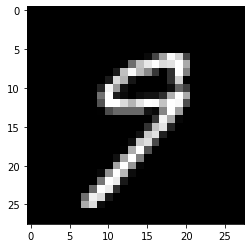

In [9]:
plt.imshow(X_train[y_train == 9][5948], cmap='gray')

In [10]:
y_train[59990:60000] #last 10 in label dataset

array([9, 2, 9, 5, 1, 8, 3, 5, 6, 8], dtype=uint8)

In [11]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


In [12]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [13]:
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [14]:
y_train[59990:60000] # look at above cell, 9 position will be 0,0,0,0,0,0,0,0,1 in categorical 

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [15]:
#let's normalize
X_train = X_train / 255 #255/255=1  127/255=0.5 ...
X_test = X_test / 255

In [16]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [17]:
# flatten
n_pixels = 784
X_train = X_train.reshape(X_train.shape[0],n_pixels)
X_test = X_test.reshape(X_test.shape[0],n_pixels)
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [18]:
def cread_model():
    model = Sequential()
    model.add(Dense(10, input_dim=n_pixels, activation="relu"))
    model.add(Dense(30, activation="relu"))
    model.add(Dense(10, activation='softmax'))
    model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [19]:
model = cread_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_1 (Dense)              (None, 30)                330       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                310       
Total params: 8,490
Trainable params: 8,490
Non-trainable params: 0
_________________________________________________________________


In [20]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs= 20, batch_size=200, verbose=1, shuffle=1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 2s 45us/sample - loss: 0.4583 - accuracy: 0.8606 - val_loss: 0.2502 - val_accuracy: 0.9265
Epoch 2/20
54000/54000 [==============================] - 2s 36us/sample - loss: 0.2877 - accuracy: 0.9153 - val_loss: 0.2283 - val_accuracy: 0.9315
Epoch 3/20
54000/54000 [==============================] - 2s 35us/sample - loss: 0.2627 - accuracy: 0.9219 - val_loss: 0.2369 - val_accuracy: 0.9225
Epoch 4/20
54000/54000 [==============================] - 2s 43us/sample - loss: 0.2504 - accuracy: 0.9259 - val_loss: 0.2137 - val_accuracy: 0.9340
Epoch 5/20
54000/54000 [==============================] - 2s 38us/sample - loss: 0.2414 - accuracy: 0.9275 - val_loss: 0.2168 - val_accuracy: 0.9337
Epoch 6/20
54000/54000 [==============================] - 2s 40us/sample - loss: 0.2337 - accuracy: 0.9289 - val_loss: 0.2175 - val_accuracy: 0.9365
Epoch 7/20
54000/54000 [==============================] -

Text(0.5, 0, 'epoch')

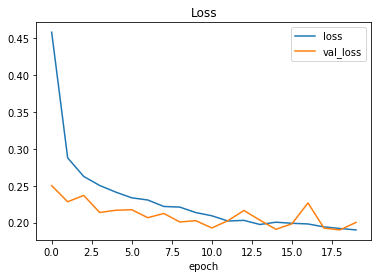

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

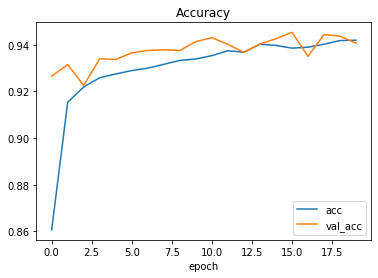

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['acc', 'val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [68]:
score = model.evaluate(X_test, y_test, verbose = 1)
print(type(score))
print("loss: ",score[0])
print("accuracy: ",score[1])

10000/10000 [==============================] - 1s 67us/sample - loss: 0.2449 - accuracy: 0.9310
<class 'list'>
loss:  0.24493439250588417
accuracy:  0.931


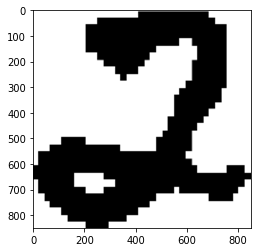

In [24]:
import requests
from PIL import Image
url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
response = requests.get(url, stream=True)
img = Image.open(response.raw)

plt.imshow(img)

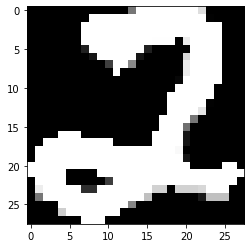

In [30]:
import cv2

img_arr = np.asarray(img)
resize = cv2.resize(img_arr, (28,28))
gray = cv2.cvtColor(resize, cv2.COLOR_RGB2GRAY)
image = cv2.bitwise_not(gray)
plt.imshow(image, cmap='gray')

In [39]:
type(img)

PIL.PngImagePlugin.PngImageFile

In [40]:
type(img_arr)

numpy.ndarray

In [41]:
img_arr.shape

(850, 850, 4)

In [46]:
type(resize)

numpy.ndarray

In [47]:
resize.shape

(28, 28, 4)

In [56]:
print(gray.shape)
print(image.shape)

(28, 28)
(28, 28)


In [63]:
gray

array([[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        137,   0,   0,   0,   0,   0,   0,   0,   0,  33, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 253, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   1,   1,   1, 255,  19,   0,   0,   0,   0, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 222,   0,   0,   0,   0,   0,
          0,   0, 222, 255, 255, 255, 255, 255,   0,   0,   0,   0, 255,
        255, 255],
       [25

#### Below function tests `cv2.bitwise_not` is just substracting every gray pixels from 255 <br>
that will inverse the color space

In [62]:
image[0][13] + gray[0][13]

255

In [64]:
image = image/255 #normalized
image = image.reshape(1,784) #28*28 flatten

In [65]:
predection = model.predict_classes(image)
print('predected digit: ', str(predection))

predected digit:  [5]


In [28]:
# i = plt.imread('download.png')
# i = cv2.resize(i, (28,28))
# i = cv2.cvtColor(i, cv2.COLOR_RGB2GRAY)
# plt.imshow(i, cmap='gray')
# i = i.reshape(1,784)
# predection = model.predict_classes(i)
# print('predected digit: ', str(predection))

In [31]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %conda  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%

In [32]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!
